<a href="https://colab.research.google.com/github/scheshmi/CS-SBU-MachineLearning-BSc-2022/blob/98222027/submits/98222027/project1/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading Dataset from Kaggle

In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 52.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

#Loading dataset


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
mobile_dataset = pd.read_csv('./files/train.csv')

In [94]:
mobile_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [95]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [96]:
mobile_dataset[['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'price_range']].describe()


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [97]:
mobile_dataset['price_range'].unique()

array([1, 2, 3, 0])

#Preprocessing

Null Values

In [98]:
mobile_dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As you can see there is no null value!!

Dealing with outliers

In [99]:
def detect_outlier(df,col_name):
  """
  Find indexes of outliers by computing z-score

  Parameters
  ----------
  df : pd.DataFrame
       dataframe of dataset 
  col_name : str
             name of column you want to find outliers in
  Returns
  -------
  indexes : pd.Index
            indexes of outliers
  """

  upper = df[col_name].mean() + 3 * df[col_name].std()
  lower = df[col_name].mean() - 3 * df[col_name].std()

  indexes = df[(df[col_name] > upper) | (df[col_name] < lower)].index
  return indexes

In [100]:
mobile_dataset.shape

(2000, 21)

In [101]:
%%time
for col in mobile_dataset.columns:
  if mobile_dataset[col].dtype == 'int64' or mobile_dataset[col].dtype == 'float64':
    outlier_indexes = detect_outlier(mobile_dataset,col)
    mobile_dataset.drop(outlier_indexes,inplace=True)

CPU times: user 40.1 ms, sys: 1.7 ms, total: 41.8 ms
Wall time: 42.8 ms


In [14]:
mobile_dataset.shape

(1988, 21)

#EDA

Having an imbalanced dataset?

In [15]:
mobile_dataset['price_range'].value_counts()

3    498
1    497
2    497
0    496
Name: price_range, dtype: int64

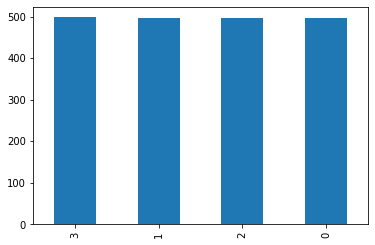

In [16]:
mobile_dataset['price_range'].value_counts().plot(kind='bar')
plt.show()

So we have balanced dataset

Histograms of numerical features

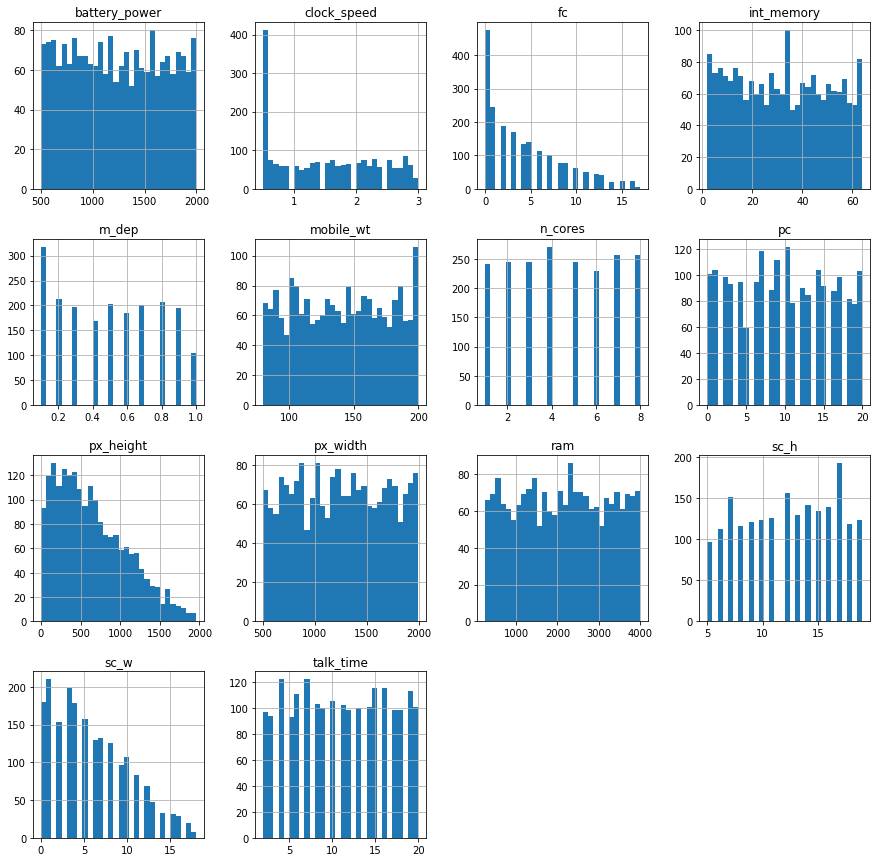

In [17]:
_ = mobile_dataset.drop(['blue','four_g','three_g','wifi','dual_sim','touch_screen','price_range'],axis=1).hist(figsize=(15,15),bins=30)


Countplots of categorical columns

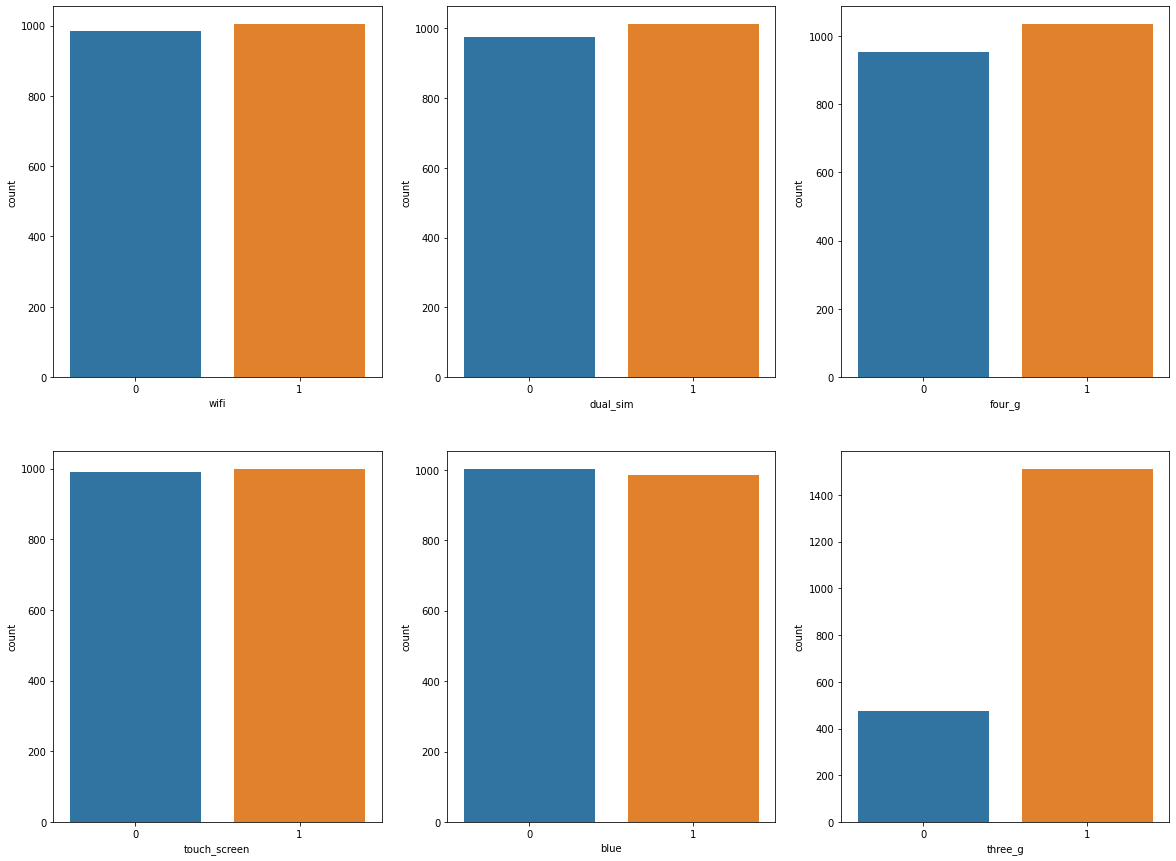

In [18]:
fig ,axs = plt.subplots(2,3)
fig.set_figheight(15)
fig.set_figwidth(20)
sns.countplot(x=mobile_dataset['wifi'],ax=axs[0,0])
sns.countplot(x=mobile_dataset['dual_sim'],ax=axs[0,1])
sns.countplot(x=mobile_dataset['four_g'],ax=axs[0,2])
sns.countplot(x=mobile_dataset['touch_screen'],ax=axs[1,0])
sns.countplot(x=mobile_dataset['blue'],ax=axs[1,1])
sns.countplot(x=mobile_dataset['three_g'],ax=axs[1,2])

plt.show()

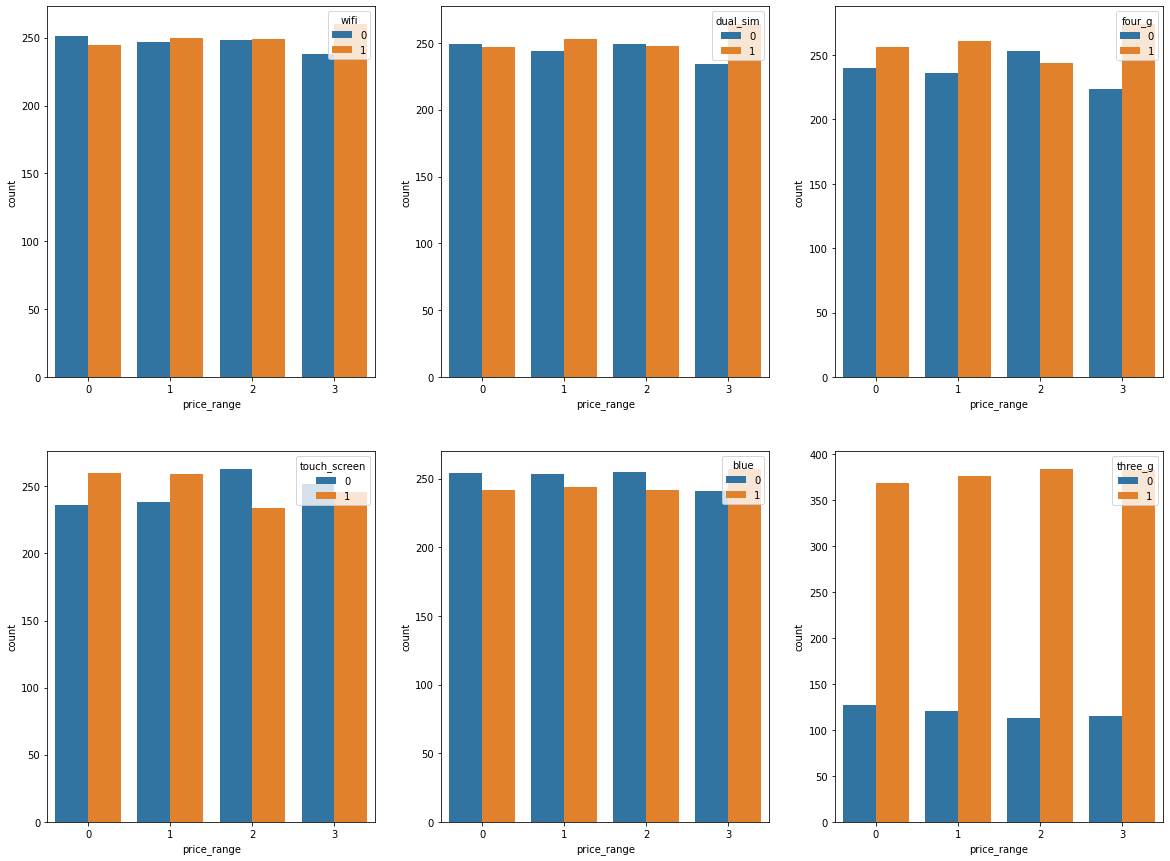

In [19]:
fig ,axs = plt.subplots(2,3)
fig.set_figheight(15)
fig.set_figwidth(20)
x=mobile_dataset.price_range
sns.countplot(x=x,hue=mobile_dataset['wifi'],ax=axs[0,0])
sns.countplot(x=x,hue=mobile_dataset['dual_sim'],ax=axs[0,1])
sns.countplot(x=x,hue=mobile_dataset['four_g'],ax=axs[0,2])
sns.countplot(x=x,hue=mobile_dataset['touch_screen'],ax=axs[1,0])
sns.countplot(x=x,hue=mobile_dataset['blue'],ax=axs[1,1])
sns.countplot(x=x,hue=mobile_dataset['three_g'],ax=axs[1,2])
plt.show()

Relationship between battery power and ram

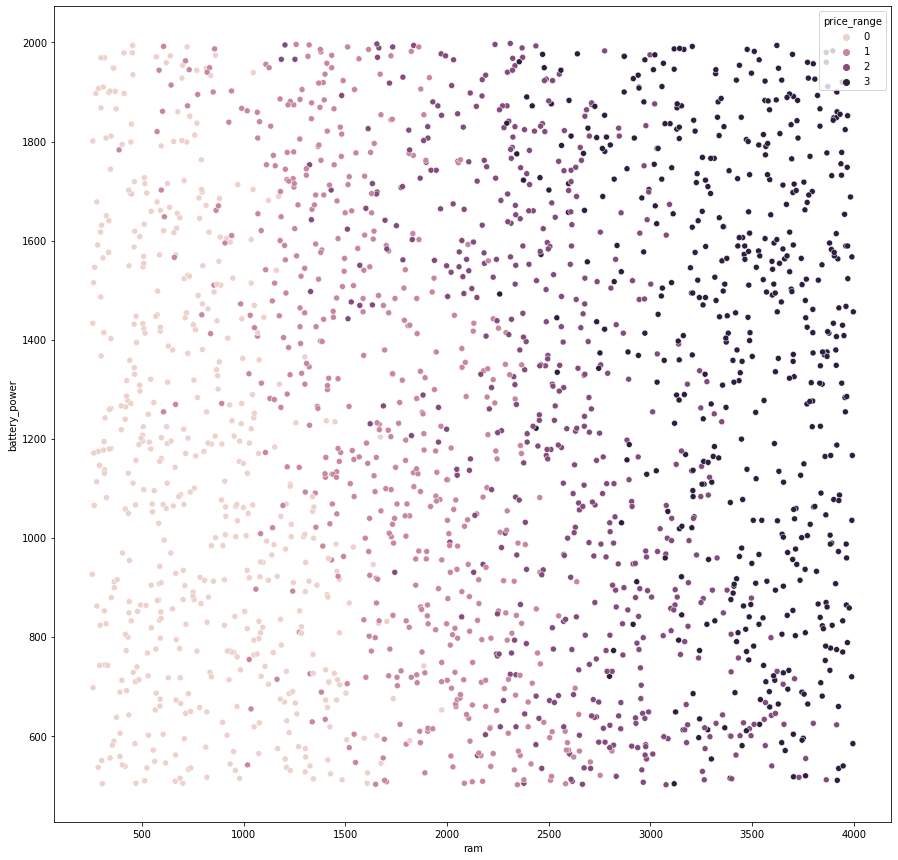

In [20]:
plt.figure(figsize = (15,15))
sns.scatterplot(x=mobile_dataset.ram,y=mobile_dataset.battery_power,hue=mobile_dataset['price_range'])
plt.show()

Histogram of ram column

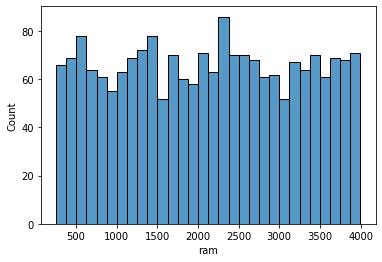

In [21]:
sns.histplot(x=mobile_dataset.ram,bins=30)

Relationship between ram and price range

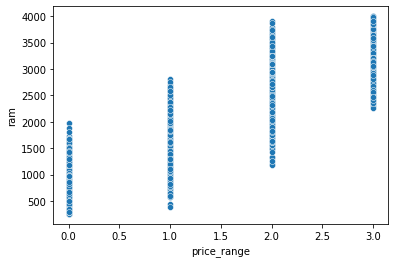

In [22]:
sns.scatterplot(x=mobile_dataset.price_range,y=mobile_dataset.ram)

Relationship between battery power and price range

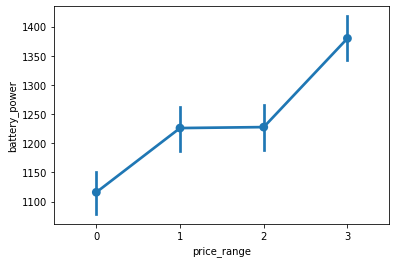

In [23]:
sns.pointplot(data=mobile_dataset,y="battery_power", x="price_range")

Relationship between px_height ,px_width and price range

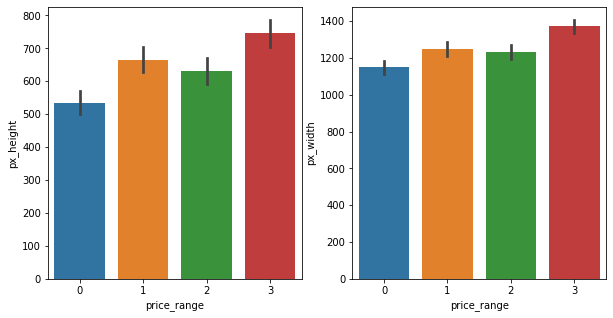

In [24]:
fig , axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.barplot(data=mobile_dataset,x='price_range',y='px_height',ax=axs[0])
sns.barplot(data=mobile_dataset,x='price_range',y='px_width',ax=axs[1])
plt.savefig('px_price.jpg')
plt.show()

Correlation matrix

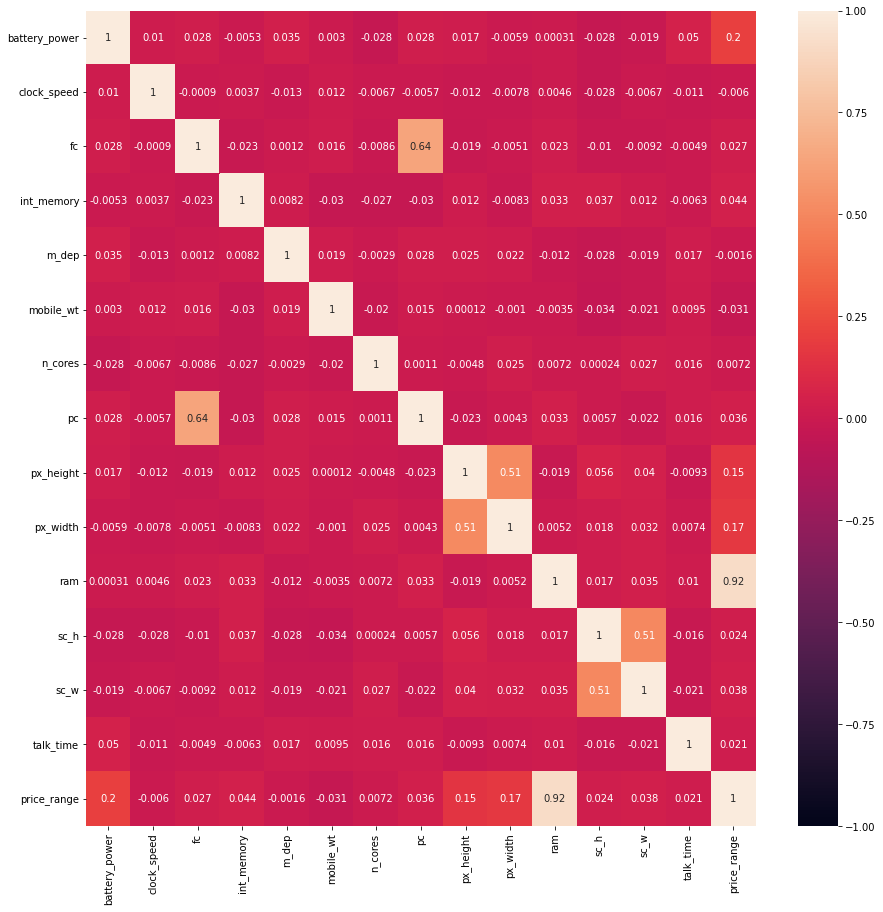

In [25]:
corr = mobile_dataset.drop(['blue','four_g','three_g','wifi','dual_sim','touch_screen'],axis=1).corr()
fig = plt.figure(figsize= (15,15))
sns.heatmap(corr, annot=True,vmin=-1,vmax=1)
plt.savefig('corr.jpg')

In [26]:
abs_corr = abs(corr)
abs_corr['price_range'].sort_values(ascending=False,)

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
mobile_wt        0.031180
fc               0.027334
sc_h             0.024294
talk_time        0.020810
n_cores          0.007159
clock_speed      0.006042
m_dep            0.001570
Name: price_range, dtype: float64

#Hypothesis tests

Q1 : Relation between two categorical features wifi and touch screen



*   H0 : the two features are independent
*   H1 : the two features are dependent


In [27]:
contingency_table=pd.crosstab(mobile_dataset["wifi"],mobile_dataset["touch_screen"])
contingency_table

touch_screen,0,1
wifi,,
0,495,489
1,494,510


In [28]:
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value <= 0.05:
    print("reject H0 , two features are dependent")
else:
    print("retain H0 , two features are independent ")

print(f'stat : {stat} , p_value : {p_value} ' )

retain H0 , two features are independent 
stat : 0.19921331949641355 , p_value : 0.6553565825170761 


Q2 : Ram feature has Gaussian distribution or not


*   H0 : ram has a Gaussian distribution.
*   H1 : ram does not have a Gaussian distribution.



In [29]:
from scipy.stats import normaltest
stat, p_value = normaltest(mobile_dataset['ram'])
if p_value <= 0.05:
    print("reject H0 , ram does not have a Gaussian distribution")
else:
    print("retain H0 , ram has a Gaussian distribution")
print(f'stat : {stat} , p_value : {p_value} ' )

reject H0 , ram does not have a Gaussian distribution
stat : 1449.7033119300545 , p_value : 0.0 


Q3 : Phones have average 4 cpu cores


*   H0 : mean of n_cores is  4
*   H1 : mean of n_cores is not  4



In [30]:
from scipy.stats import ttest_1samp

stat,p_value = ttest_1samp(mobile_dataset.n_cores,popmean = 4)
if p_value <= 0.05:
    print("reject H0")
else:
    print("retain H0 ")

print(f'stat : {stat} , p_value : {p_value} ')

reject H0
stat : 10.205350276936688 , p_value : 7.196966917924235e-24 


Q4 : Relation between two categorical features 3G and 4G


*   H0 : the two features are independent
*   H1 : the two feature are dependent

In [31]:
contingency_3g_4g=pd.crosstab(mobile_dataset["four_g"],mobile_dataset["three_g"])
contingency_3g_4g

three_g,0,1
four_g,,
0,476,477
1,0,1035


In [32]:
stat, p_value, dof, expected = chi2_contingency(contingency_3g_4g)
if p_value <= 0.05:
    print("reject H0 , two features are dependent")
else:
    print("retain H0 , two features are independent ")

print(f'stat : {stat} , p_value : {p_value} ' )

reject H0 , two features are dependent
stat : 676.9626985235323 , p_value : 3.057991673651438e-149 


Q5 : Are talk time and battery power related?


*   H0 : the two features are independent.
*   H1 : the two features are dependent.



In [33]:
from scipy.stats import pearsonr
stat, p_value = pearsonr(mobile_dataset.talk_time, mobile_dataset.battery_power)

if p_value <= 0.05:
    print("reject H0 , two features are dependent")
else:
    print("retain H0 , two features are independent ")

print(f'stat : {stat} , p_value : {p_value} ' )

reject H0 , two features are dependent
stat : 0.050307392525290186 , p_value : 0.024892628139786186 


# Model Training

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Splitting train and test dataset

In [35]:
data = mobile_dataset.drop(columns='price_range')
target = mobile_dataset['price_range']
data_train , data_test , target_train , target_test = train_test_split(data,target,test_size = 0.2, random_state=42)

Hyperparameter tuning :
trying different scalers , penalties and Cs

In [119]:
%%time

model = Pipeline([('scaler', StandardScaler()),('logistic_reg',LogisticRegression(solver='saga',max_iter=10000))])
param_grid = {
    'scaler' :[MinMaxScaler(), StandardScaler(), None],
    'logistic_reg__C': [0.01,0.1,1,10,100],
    'logistic_reg__penalty' :['l1','l2']
}
grid = GridSearchCV(model,param_grid=param_grid,n_jobs=-1,cv=5)
grid.fit(data_train,target_train)

CPU times: user 12min 54s, sys: 629 ms, total: 12min 54s
Wall time: 7min


In [37]:
cv_result = pd.DataFrame(grid.cv_results_)
useful_cols = ['mean_fit_time','mean_score_time','param_logistic_reg__C', 'param_logistic_reg__penalty', 'param_scaler',
       'mean_test_score', 'std_test_score','rank_test_score']
cv_result = cv_result[useful_cols]
cv_result.sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,param_logistic_reg__C,param_logistic_reg__penalty,param_scaler,mean_test_score,std_test_score,rank_test_score
13,1.130730,0.003629,1,l1,StandardScaler(),0.968553,0.010334,1
18,2.367287,0.003223,10,l1,MinMaxScaler(),0.966667,0.009455,2
22,0.515907,0.003378,10,l2,StandardScaler(),0.965409,0.009538,3
25,2.373213,0.003259,100,l1,StandardScaler(),0.965409,0.004872,3
27,1.533885,0.004290,100,l2,MinMaxScaler(),0.964780,0.010599,5
28,1.733635,0.003253,100,l2,StandardScaler(),0.964780,0.004172,5
19,2.348430,0.003269,10,l1,StandardScaler(),0.964151,0.005109,7
24,2.369207,0.003327,100,l1,MinMaxScaler(),0.963522,0.006475,8
12,1.140644,0.003313,1,l1,MinMaxScaler(),0.961635,0.010411,9
16,0.253195,0.005202,1,l2,StandardScaler(),0.955975,0.011933,10


In [38]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_reg',
                 LogisticRegression(C=1, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [40]:
preprocessor = StandardScaler()
scaled_data_train = preprocessor.fit_transform(data_train)
logistic_reg = LogisticRegression(C=1,penalty='l1',solver='saga',max_iter=1000)
logistic_reg.fit(scaled_data_train,target_train)
scaled_data_test = preprocessor.transform(data_test)
accuracy =logistic_reg.score(scaled_data_test,target_test)
print(f'Accuracy of logistic regression : {accuracy :.3f} ')

Accuracy of logistic regression : 0.975 


Confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
predicted = logistic_reg.predict(scaled_data_test)
con_matrix = confusion_matrix(target_test,predicted)

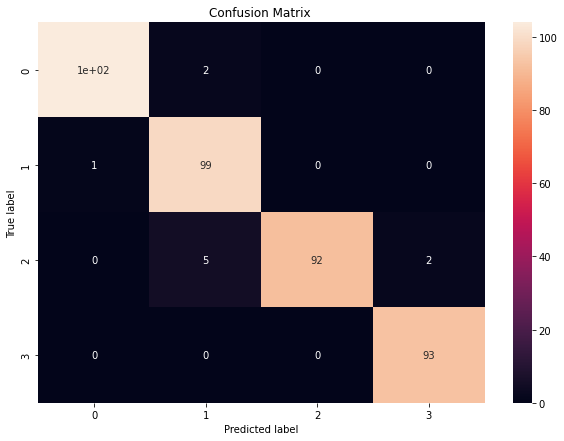

In [45]:
plt.figure(figsize = (10,7))
ax = sns.heatmap(con_matrix,annot= True,)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix ')


Normalized confusion matrix

In [46]:
con_matrix_normalized = con_matrix.astype('float') / con_matrix.sum(axis=1)[:, np.newaxis]

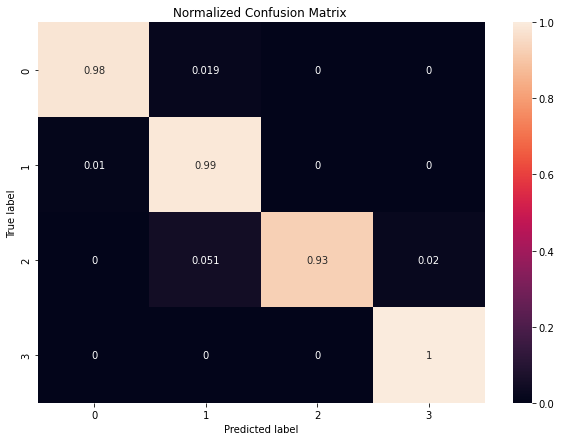

In [48]:
plt.figure(figsize = (10,7))
ax = sns.heatmap(con_matrix_normalized,annot= True,)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix ')

##PCA

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
param_grid = {
    'pca__n_components' : [0.99, 0.95, 0.9,0.8 ,0.75]
}
model_pca = make_pipeline(PCA(),LogisticRegression(max_iter=1000))

grid_pca = GridSearchCV(model_pca,param_grid=param_grid,cv=5,n_jobs=-1)
grid_pca.fit(data_train,target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.99, 0.95, 0.9, 0.8, 0.75]})

In [54]:
pca_cv_result = pd.DataFrame(grid_pca.cv_results_)
pca_cv_result = pca_cv_result[ ['mean_fit_time','mean_score_time','param_pca__n_components',
       'params','mean_test_score', 'std_test_score','rank_test_score']]

In [55]:
pca_cv_result.sort_values('rank_test_score')

,mean_fit_time,mean_score_time,param_pca__n_components,params,mean_test_score,std_test_score,rank_test_score
2,0.166788,0.003703,0.9,{'pca__n_components': 0.9},0.956604,0.014259,1
0,0.265617,0.004391,0.99,{'pca__n_components': 0.99},0.954717,0.011699,2
1,0.247802,0.004691,0.95,{'pca__n_components': 0.95},0.954717,0.011699,2
3,0.072011,0.003672,0.8,{'pca__n_components': 0.8},0.800000,0.011356,4
4,0.069566,0.003253,0.75,{'pca__n_components': 0.75},0.800000,0.011356,4


In [52]:
pca_score = grid_pca.score(data_test,target_test)

print(f'Accuracy of pca model : {pca_score:.3f}')

Accuracy of pca model : 0.962


# Creating new dataset by labelling

In [62]:
others_classes = [1,2,3]

def return_label(col):
  """
  Return new label for instance

  Parameters
  ----------
  col : pd.Series
       target column of dataset
  
  Returns
  -------
  int
      return 4 if label of instance is one of 1,2,3 otherwise 0
  """
  if col in others_classes:
    return 4
  else:
    return 0

In [63]:
new_dataset = pd.read_csv('./files/train.csv')
new_dataset['new_price_range'] = new_dataset.price_range.apply(return_label)
new_dataset.drop('price_range',axis=1,inplace=True)

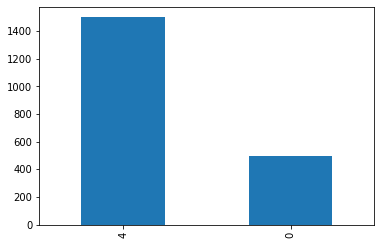

In [64]:
new_dataset.new_price_range.value_counts().plot(kind='bar')

In [65]:
new_dataset.new_price_range.value_counts()/len(new_dataset)

4    0.75
0    0.25
Name: new_price_range, dtype: float64

In [66]:
new_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,new_price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,4
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,4
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,4
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,4
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,4


In [67]:
new_target = new_dataset['new_price_range']
new_data = new_dataset.drop('new_price_range',axis=1)

new_data_train , new_data_test , new_target_train,new_target_test = train_test_split(new_data,new_target,test_size=0.2,random_state=42)

preprocessor = StandardScaler()
scaled_new_data_train = preprocessor.fit_transform(new_data_train)
logistic_reg = LogisticRegression()
logistic_reg.fit(scaled_new_data_train,new_target_train)
scaled_new_data_test = preprocessor.transform(new_data_test)
lr_score = logistic_reg.score(scaled_new_data_test,new_target_test)
print(f'Accuracy of logistic regression : {lr_score:.3f}')

Accuracy of logistic regression : 0.990


Confusion matrix

In [68]:
new_predicted = logistic_reg.predict(scaled_new_data_test)
new_con_matrix = confusion_matrix(new_target_test,new_predicted,labels=logistic_reg.classes_)

Text(0.5, 1.0, 'Confusion Matrix ')

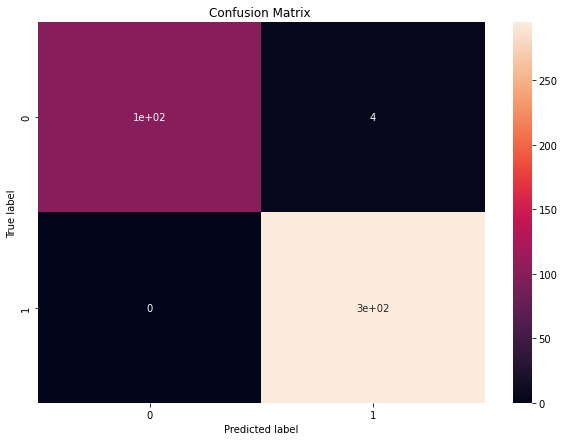

In [77]:
plt.figure(figsize = (10,7))
ax = sns.heatmap(new_con_matrix,annot= True,)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix ')

In [70]:
new_con_matrix

array([[101,   4],
       [  0, 295]])

Normalized confusion matrix

In [74]:
new_con_matrix_normalized = new_con_matrix.astype('float') / new_con_matrix.sum(axis=1)[:, np.newaxis]

Text(0.5, 1.0, 'Normalized Confusion Matrix ')

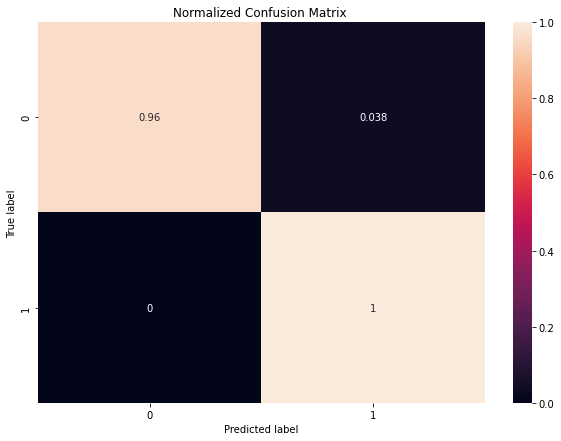

In [78]:
plt.figure(figsize = (10,7))
ax = sns.heatmap(new_con_matrix_normalized,annot= True,)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix ')

Classification report

In [72]:
from sklearn.metrics import f1_score, classification_report

In [73]:
report = classification_report(new_predicted,new_target_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           4       1.00      0.99      0.99       299

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



Upsampling minority class


In [80]:
from sklearn.utils import resample
majority = new_dataset[new_dataset['new_price_range' ]== 4]
minority = new_dataset[new_dataset['new_price_range' ]== 0]

minority_upsampled = resample(minority,replace=True,random_state=42,n_samples= 1500)

upsampled_dataset = pd.concat([majority,minority_upsampled])

upsampled_dataset.new_price_range.value_counts()

4    1500
0    1500
Name: new_price_range, dtype: int64

In [81]:
upsampled_target = upsampled_dataset['new_price_range']
upsampled_data = upsampled_dataset.drop('new_price_range',axis=1)

upsampled_train , upsampled_test ,upsampled_target_train,upsampled_target_test = train_test_split(upsampled_data,upsampled_target,test_size=0.2,random_state=42)
preprocessor = StandardScaler()
scaled_upsampled_train = preprocessor.fit_transform(upsampled_train)
logistic_reg = LogisticRegression()
logistic_reg.fit(scaled_upsampled_train,upsampled_target_train)
scaled_upsampled_test = preprocessor.transform(upsampled_test)
acc_upsampled = logistic_reg.score(scaled_upsampled_test,upsampled_target_test)
print(f'Accuracy of upsampled model : {acc_upsampled:.3f} ')

Accuracy of upsampled model : 0.983 


Classification report

In [82]:
upsampled_predicted = logistic_reg.predict(scaled_upsampled_test)
upsampled_con_matrix = confusion_matrix(upsampled_target_test,upsampled_predicted,labels=logistic_reg.classes_)

In [83]:
report = classification_report(upsampled_target_test,upsampled_predicted,labels=logistic_reg.classes_)

In [84]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       287
           4       1.00      0.97      0.98       313

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



# EXTRA EXERCISES


In [86]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 136 kB 5.1 MB/s 
     |████████████████████████████████| 837 kB 47.9 MB/s 
     |████████████████████████████████| 830 kB 40.4 MB/s 
     |████████████████████████████████| 822 kB 53.7 MB/s 
     |████████████████████████████████| 802 kB 51.2 MB/s 
     |████████████████████████████████| 802 kB 43.1 MB/s 
     |████████████████████████████████| 793 kB 51.4 MB/s 
     |████████████████████████████████| 793 kB 64.7 MB/s 
     |████████████████████████████████| 791 kB 56.0 MB/s 
     |████████████████████████████████| 786 kB 40.1 MB/s 
     |████████████████████████████████| 779 kB 49.3 MB/s 
     |████████████████████████████████| 778 kB 39.8 MB/s 
     |████████████████████████████████| 776 kB 76.1 MB/s 
     |████████████████████████████████| 769 kB 46.2 MB/s 
     |████████████████████████████████| 766 kB 57.8 MB/s 
     |████████████████████████████████| 1.0 MB 34.0 MB/s 
     |████████████████████████████████| 722 kB 54.4 MB/s 
     |█████████

In [116]:
!pip install dask_ml --upgrade

  Using cached dask_ml-2022.1.22-py3-none-any.whl (148 kB)
  Attempting uninstall: dask-ml
    Found existing installation: dask-ml 1.1.1
    Uninstalling dask-ml-1.1.1:
      Successfully uninstalled dask-ml-1.1.1


##Preprocessing by dask

In [114]:
import dask
import dask.dataframe as dd
import dask_ml

In [88]:
mobile_dd = dd.from_pandas(pd.read_csv('./files/train.csv'),npartitions=2)

In [89]:
mobile_dd

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
npartitions=2,,,,,,,,,,,,,,,,,,,,,
0,int64,int64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
1000,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [90]:
%%time
for col in mobile_dd.columns:
  if mobile_dd[col].dtype == 'int64' or mobile_dd[col].dtype == 'float64':
    upper = mobile_dd[col].mean() + 3 * mobile_dd[col].std()
    lower = mobile_dd[col].mean() - 3 * mobile_dd[col].std()
    
    mobile_dd= mobile_dd[~((mobile_dd[col] > upper) | (mobile_dd[col] < lower))]

CPU times: user 432 ms, sys: 3.09 ms, total: 436 ms
Wall time: 839 ms


In [91]:
mobile_dd.compute().shape

(1988, 21)

In [105]:
from dask_ml.model_selection import train_test_split
data = mobile_dd.drop(columns='price_range')
target = mobile_dd['price_range']
dd_train , dd_test , dd_target_train , dd_target_test = train_test_split(data,target,test_size = 0.2, random_state=42)

Model training by dask_ml

In [120]:
%%time
from dask_ml.model_selection import GridSearchCV
from dask_ml.preprocessing import StandardScaler,MinMaxScaler
dask_model = Pipeline([('scaler', StandardScaler()),('logistic_reg',LogisticRegression(solver='saga',max_iter=10000))])
param_grid = {
    'scaler' :[MinMaxScaler(), StandardScaler(), None],
    'logistic_reg__C': [0.01,0.1,1,10,100],
    'logistic_reg__penalty' :['l1','l2']
}
grid_dask = GridSearchCV(dask_model,param_grid=param_grid,n_jobs=-1,cv=5)
grid_dask.fit(dd_train,dd_target_train)


CPU times: user 12min 43s, sys: 890 ms, total: 12min 43s
Wall time: 6min 30s


In [118]:
cv_dask = pd.DataFrame(grid_dask.cv_results_)
cv_dask = cv_dask[['mean_fit_time','mean_score_time','param_logistic_reg__C', 'param_logistic_reg__penalty', 'param_scaler',
       'mean_test_score', 'std_test_score','rank_test_score']]
cv_dask.sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,param_logistic_reg__C,param_logistic_reg__penalty,param_scaler,mean_test_score,std_test_score,rank_test_score
18,2.332173,0.006673,10,l1,MinMaxScaler(),0.971501,0.003468,1
24,2.331650,0.006581,100,l1,MinMaxScaler(),0.970868,0.003674,2
27,1.514864,0.008267,100,l2,MinMaxScaler(),0.968334,0.002036,3
12,1.104362,0.006649,1,l1,MinMaxScaler(),0.966434,0.006546,4
21,0.363180,0.006577,10,l2,MinMaxScaler(),0.956935,0.008162,5
15,0.099943,0.006574,1,l2,MinMaxScaler(),0.917036,0.004683,6
6,0.098616,0.006579,0.1,l1,MinMaxScaler(),0.837872,0.023931,7
9,0.041654,0.006626,0.1,l2,MinMaxScaler(),0.770108,0.015302,8
1,0.052953,0.007024,0.01,l1,StandardScaler(),0.698543,0.013374,9
14,4.273868,0.003311,1,l1,None,0.659278,0.033359,10
